## Model 01 : Mult-linear Regression

>This is the model used for hyper parmemter tuning to maximize r sqaure score
>- area
>- bedrooms
>- bathrooms
>- stories
>- hotwaterheating_encoded
>- airconditioning_encoded
>- prefarea_ecoded

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
house_df = pd.read_csv('Housing.csv')

for i, ele in enumerate(house_df):
    print(f'{i}: {ele}')

0: price
1: area
2: bedrooms
3: bathrooms
4: stories
5: mainroad
6: guestroom
7: basement
8: hotwaterheating
9: airconditioning
10: parking
11: prefarea
12: furnishingstatus


In [88]:
# dropping columns for hyper parmeter tuning
# house_df = house_df.drop(columns=['bathrooms','stories', 'mainroad', 'guestroom', 'basement','parking', 'prefarea'])
house_df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### Removing Outliers

In [89]:
price = house_df['price']
mean = price.mean()
sd = price.std()

outliers = (price < mean-3*sd) | (price > mean+3*sd)  
house_df[outliers]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [90]:
house_df = house_df.drop([0,1,2,3,4,5])
house_df[outliers]

/tmp/ipykernel_5684/1196213722.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  house_df[outliers]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


### Checking binary and ordinal data counts in each column

In [91]:
house_df['hotwaterheating'].value_counts()

hotwaterheating
no     514
yes     25
Name: count, dtype: int64

In [92]:
house_df['airconditioning'].value_counts()

airconditioning
no     372
yes    167
Name: count, dtype: int64

In [93]:
house_df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    225
unfurnished       178
furnished         136
Name: count, dtype: int64

### Encoding the binary and ordinal columns

In [94]:
# Binary data encoding 
bi_mapping = {"no" : 0, "yes" : 1}
# 
house_df['hotwaterheating_encoded'] = house_df['hotwaterheating'].map(bi_mapping)
house_df['airconditioning_encoded'] = house_df['airconditioning'].map(bi_mapping)

# house_df['mainroad_ecoded'] = house_df['mainroad'].map(bi_mapping) ##drops optimal r2_score from .6 to .585
# house_df['guestroom_ecoded'] = house_df['guestroom'].map(bi_mapping) ##drops optimal r2_score from .6 to .585
# house_df['basement_ecoded'] = house_df['basement'].map(bi_mapping) ##drops optimal r2_score from .6 to .549
house_df['prefarea_ecoded'] = house_df['prefarea'].map(bi_mapping)

In [95]:
furnishingstatus_mapping = {"unfurnished" : 0, "semi-furnished" : 1, "furnished" : 2}

house_df['furnishingstatus_encoded'] = house_df['furnishingstatus'].map(furnishingstatus_mapping)

### Dropping columns that are encoded

In [96]:
house_df = house_df.drop(columns=['hotwaterheating','airconditioning','furnishingstatus'])
house_df = house_df.drop(columns=['mainroad', 'guestroom', 'basement', 'prefarea'])
# house_df = house_df.drop(columns=['stories'])
# house_df = house_df.drop(columns=['bedrooms'])
# house_df = house_df.drop(columns=['bathrooms'])
# house_df = house_df.drop(columns=['parking'])

house_df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,hotwaterheating_encoded,airconditioning_encoded,prefarea_ecoded,furnishingstatus_encoded
6,10150000,8580,4,3,4,2,0,1,1,1
7,10150000,16200,5,3,2,0,0,0,0,0
8,9870000,8100,4,1,2,2,0,1,1,2
9,9800000,5750,3,2,4,1,0,1,1,0
10,9800000,13200,3,1,2,2,0,1,1,2


### Dividing up the dependent and independent variables to X and y


In [97]:
X = house_df.iloc[:, 1:]
y = house_df.iloc[:, 0].values
y = y.reshape(len(y),1)

### Spliting the training and test set to a 80:20 proportion

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [99]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 1182901959501.38
Mean Absolute Error (MAE): 778626.61
R-Squared (R2): 0.6206


### Spliting the traing and test set to a 70:30 proportion

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.6531904195496214

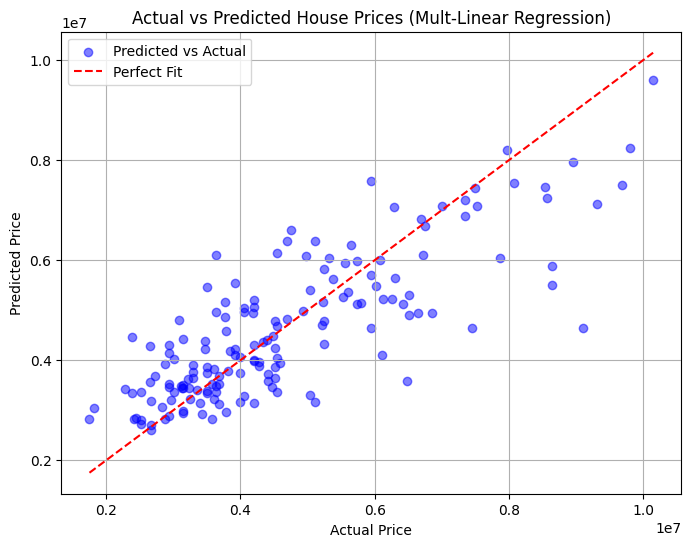

In [104]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Mult-Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()